# **Projeto AceleraDev Data Science**

### **Objetivo**

O objetivo deste produto é fornecer um serviço automatizado que recomenda leads para um usuário dado sua atual lista de clientes (Portfólio).

### **Contextualização**

Algumas empresas gostariam de saber quem são as demais empresas em um determinado mercado (população) que tem maior probabilidade se tornarem seus próximos clientes. Ou seja, a sua solução deve encontrar no mercado quem são os leads mais aderentes dado as características dos clientes presentes no portfólio do usuário.

Além disso, sua solução deve ser agnóstica ao usuário. Qualquer usuário com uma lista de clientes que queira explorar esse mercado pode extrair valor do serviço.

Para o desafio, deverão ser consideradas as seguintes bases:

* Mercado: Base com informações sobre as empresas do Mercado a ser considerado. 
* Portfolio 1: Ids dos clientes da empresa 1 
* Portfolio 2: Ids dos clientes da empresa 2 
* Portfolio 3: Ids dos clientes da empresa 3

Obs: todas as empresas(ids) dos portfolios estão contidos no Mercado(base de população).

Link para download das bases Mercado, Portfolio 1, Portfolio 2 e Portfolio 3:

[Mercado](https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_market.csv.zip)

[Portfolio 1](https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio1.csv)

[Portfolio 2](https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio2.csv)

[Portfolio 3](https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio3.csv)

As bases de portfólio poderão ser utilizadas para testar a aderência da solução. Além disso, se a equipe desejar, poderá simular portfólios por meio de amostragens no mercado.

[Descrição de variáveis](https://s3-us-west-1.amazonaws.com/codenation-challenges/ml-leads/features_dictionary.pdf)

### **Requisitos técnicos obrigatórios**
* Utilizar técnicas de data science e machine learning para desenvolver o projeto;
* Apresentar o desenvolvimento e outputs do modelo em um Jupyter Notebook ou outra tecnologia de apresentação de Output de modelos de Machine Learning;
* A análise deve considerar os seguintes pontos: 
    1. análise exploratória dos dados, 
    2. tratamento dos dados,
    3. avaliação de algoritmos, 
    4. treinamento do modelo, 
    5. avaliação de performance do modelo e 
    6. visualização dos resultados;


* Para a apresentação do projeto, o tempo entre o treinamento do modelo e o output deve ser menor que 20 min.

# Importação de Bibliotecas Utilizadas

In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from itertools import chain

from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('png')

In [2]:
pd.set_option('display.max_rows', 20)

O primeiro passo é analisar os dados que temos disponiveis para decidir como iremos avançar na abordagem.

# Análise Exploratória de Dados

In [3]:
def explore_df(df): 
    explore_df = pd.DataFrame({
        'Tipo de dado' : df.dtypes,
        'Quantidade de valores únicos' : df.nunique(),
        'Quantidade de faltantes' : df.isna().sum(),
        'Porcentagem Faltante' : (df.isna().sum()/df.shape[0])*100
    })
    
    return explore_df

## Mercado

In [4]:
mercado_df = pd.read_csv('./estaticos_market.csv')
mercado_df.head()

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
mercado_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
# Verificar se tem ids repetidos
if (mercado_df['id'].nunique() == mercado_df.shape[0]):
    print("Todos os ids são únicos")
else:
    print("Há ids repetidos, portanto, empresas repetidas no dataset. Verificar.")

Todos os ids são únicos


Fazendo uma análise dos tipos de dados, quantidade de elementos únicos, quantidade e porcentagem de faltantes:

In [7]:
df_explorando = explore_df(mercado_df)
df_explorando.sort_values(by = 'Porcentagem Faltante', ascending = False)

,Tipo de dado,Quantidade de valores únicos,Quantidade de faltantes,Porcentagem Faltante
qt_alteracao_socio_total,float64,0,462298,100.000000
qt_alteracao_socio_90d,float64,0,462298,100.000000
grau_instrucao_macro_desconhecido,float64,0,462298,100.000000
qt_alteracao_socio_180d,float64,0,462298,100.000000
qt_alteracao_socio_365d,float64,0,462298,100.000000
coligada_mais_antiga_baixada,float64,46,462162,99.970582
coligada_mais_nova_baixada,float64,46,462162,99.970582
idade_media_coligadas_baixadas,float64,48,462162,99.970582
vl_total_veiculos_antt,float64,20,462122,99.961929
vl_total_tancagem,float64,33,462018,99.939433


In [8]:
# Verificar se tem ids repetidos
if (mercado_df['id'].nunique() == mercado_df.shape[0]):
    print("Todos os ids são únicos")
else:
    print("Há ids repetidos, portanto, empresas repetidas no dataset. Verificar.")

Todos os ids são únicos


In [9]:
# Remover colunas com mais de 50% de faltantes
mercado_nadropped = mercado_df.dropna(axis=1, thresh = mercado_df.shape[0]/2)
mercado_nadropped.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,...,0.0,44.0,47.0,41.0,2.0,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,...,0.0,27.0,27.0,27.0,1.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,...,0.0,32.0,32.0,32.0,NaN,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,...,0.0,36.0,36.0,36.0,1.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,...,0.0,NaN,NaN,NaN,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0


In [10]:
df_explorando = explore_df(mercado_nadropped)
df_explorando.sort_values(by = 'Porcentagem Faltante', ascending = False)

,Tipo de dado,Quantidade de valores únicos,Quantidade de faltantes,Porcentagem Faltante
qt_socios_st_regular,float64,54,154917,33.510203
idade_minima_socios,float64,114,151602,32.793133
idade_maxima_socios,float64,118,151602,32.793133
idade_media_socios,float64,1010,151602,32.793133
empsetorcensitariofaixarendapopulacao,float64,15419,143829,31.111750
qt_socios_pf,float64,64,115091,24.895414
qt_socios,float64,62,115091,24.895414
qt_socios_pj,float64,12,115091,24.895414
fl_optante_simei,object,2,82713,17.891706
fl_optante_simples,object,2,82713,17.891706


In [11]:
# Explorar apenas dimensões com dados faltantes
df_na_colunas = df_explorando.loc[df_explorando['Porcentagem Faltante'] > 0]
df_na_colunas.sort_values(by = 'Porcentagem Faltante', ascending = False)

,Tipo de dado,Quantidade de valores únicos,Quantidade de faltantes,Porcentagem Faltante
qt_socios_st_regular,float64,54,154917,33.510203
idade_maxima_socios,float64,118,151602,32.793133
idade_minima_socios,float64,114,151602,32.793133
idade_media_socios,float64,1010,151602,32.793133
empsetorcensitariofaixarendapopulacao,float64,15419,143829,31.111750
qt_socios_pf,float64,64,115091,24.895414
qt_socios_pj,float64,12,115091,24.895414
qt_socios,float64,62,115091,24.895414
fl_optante_simei,object,2,82713,17.891706
fl_optante_simples,object,2,82713,17.891706


In [12]:
# Explorar distribuição das colunas
mercado_nadropped.describe()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
count,462298.000000,460371.000000,460371.000000,417022.000000,318469.000000,347207.000000,347207.000000,347207.000000,310696.000000,310696.000000,310696.000000,307381.000000,4.347850e+05,4.347850e+05,462298.000000
mean,9.948677,3.591801,48.699177,25.007247,1308.005725,1.496326,1.476681,0.019645,42.816452,44.344131,41.355225,1.396082,8.020911e+05,3.367205e+08,28.737044
std,9.615664,72.600352,1206.696804,9.679799,1161.889222,3.276626,3.258079,0.195166,12.626447,13.930385,12.514921,2.578793,3.099979e+07,7.114614e+09,468.626094
min,0.016438,0.000000,0.000000,0.000000,100.000000,1.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,1.000000,0.000000e+00,4.104703e+04,0.000000
25%,2.756164,0.000000,0.000000,22.000000,673.230000,1.000000,1.000000,0.000000,33.000000,34.000000,32.000000,1.000000,1.648512e+05,1.854576e+05,0.000000
50%,6.704110,0.000000,0.000000,23.000000,946.680000,1.000000,1.000000,0.000000,42.000000,43.000000,40.000000,1.000000,2.100000e+05,2.100000e+05,0.000000
75%,14.465753,0.000000,0.000000,25.000000,1518.080000,2.000000,2.000000,0.000000,51.000000,54.000000,50.000000,1.000000,2.100000e+05,2.100000e+05,0.000000
max,106.432877,9782.000000,122090.000000,66.000000,75093.840000,246.000000,246.000000,13.000000,127.000000,127.000000,127.000000,179.000000,1.454662e+10,2.227618e+11,9647.000000


Sobre essas colunas:
- [ ] `qt_socios_st_regular`: quantidade de sócios com situação regular na receita
- [ ] `idade_minima_socios` : considera apenas sócios/parceiros CPF
- [ ] `idade_maxima_socios`: considera apenas sócios/parceiros CPF
- [ ] `idade_media_socios` : considera apenas sócios/parceiros CPF
- [ ] `empsetorcensitariofaixarendapopulacao`: renda média de uma amostra de residentes de uma unidade do censo (menor área territorial do IBGE, creio que seja município)
- [ ] `qt_socios_pf` : quantidade de sócios/parceiros PF
- [ ] `qt_socios` : quantidade total de sócios/parceiros   
- [ ] `qt_socios_pj` : quantiadde de sócios/parceiros PJ 
- [ ] `fl_optante_simei` : True se empresa é taxada como MEI
- [ ] `fl_optante_simples` : True se empresa é taxada como Simples
- [ ] `nm_micro_regiao` : Cidade que a empresa é localizada
- [ ] `nm_meso_regiao` : Meso região, por exemplo 'Sul Maranhense'
- [ ] `nu_meses_rescencia` : Número de meses desde a última atualização da entrada mais atrasada da sua saúde tributária
- [ ] `de_faixa_faturamento_estimado` : classe do faturamento estimado (ie. 'DE R\$ 360.000,01 A R\$ 1.500.000,00').
- [ ] `de_faixa_faturamento_estimado_grupo` : classe da soma dos faturamentos estimados para a matriz junto com as filiais
- [ ] `vl_faturamento_estimado_aux` : valor do faturamento estimado
- [ ] `vl_faturamento_estimado_grupo_aux` : valor do faturamento estimado da matriz junto com as filiais
- [ ] `de_saude_rescencia` : tempo de atualização da última entrada/registro  deste indicador
- [ ] `de_saude_tributaria` : Indicador da saúde tributária (impostos pagos). Vai de verde a vermelho, passando por azul, cinza, amarelo e laranja.
- [ ] `de_nivel_atividade` :  probabilidade de ser operante. De muito baixa a alta
- [ ] `sg_uf_matriz` : unidade federativa da matriz
- [ ] `setor`
- [ ] `fl_passivel_iss`
- [ ] `vl_total_veiculos_leves_grupo`
- [ ] `vl_total_veiculos_pesados_grupo`
- [ ] `fl_veiculo`
- [ ] `fl_antt`
- [ ] `fl_spa`
- [ ] `nm_segmento`
- [ ] `nm_divisao`
- [ ] `fl_simples_irregular`
- [ ] `dt_situacao`

In [13]:
colunas_na = list(df_na_colunas.T.columns)
mercado_na = mercado_nadropped.loc[:,colunas_na]

# Explorar moda das colunas
mercado_na.mode().iloc[:, 20:40]

,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux
0,True,1.0,1.0,0.0,36.0,37.0,36.0,1.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0


Considerações feitas partindo da intenção de evitar retirar empresas do portfólio (evitar remover fileiras):

- Como a idade mínima, máxima e média dos sócios têm características semelhantes e são dimensões que se relacionam, **vamos considerar apenas a idade média**, e preencher os valores NA com a média
- Para `empsetorcensitariofaixarendapopulacao` podemos inputar com a média. Ou procurar no IBGE a média para o município ou UF.
- Para `qt_socios_st_regular`, inputar com a média/moda que é igual (1) e esse valor é presente em pelo menos 75% do portfólio. O mesmo para `qt_socios` (1), `qt_socios_pf` (1) e `qt_socios_pj` (0). Verificar depois se algum MEI (até R\$ 81.000,00 ficou com algum sócio e setar valores pros 3 para 0)
- Para `fl_optante_simei` considerar True para empresas `fl_mei = True`. Caso contrário False 
- Para `fl_optante_simples`, considerar True para empresas `fl_me = True` ou `fl_epp = True`. Caso contrário, False.
- Desconsiderar/remover `nu_meses_rescencia`.
- Para `vl_faturamento_estimado_aux` e `vl_faturamento_estimado_grupo_aux` usar a moda, assim como para as classificações `de_faixa_faturamento_estimado` e  `de_faixa_faturamento_estimado_grupo` 
- Para variáveis categóricas e sem outro tratamento, imputamos 'SEM INFORMAÇÃO'

Colunas que permanecem e método de lidar com os valores faltantes:
- [x] `idade_media_socios` : Imputação da média
- [x] `empsetorcensitariofaixarendapopulacao`: Imputação média
- [x] `qt_socios` : imputar moda
- [x] `de_faixa_faturamento_estimado` : Imputar moda
- [x] `de_faixa_faturamento_estimado_grupo` : Imputar moda
- [x] `de_saude_rescencia` : Imputar moda
- [x] `de_saude_tributaria` : Imputar moda
- [x] `de_nivel_atividade` :  Imputar moda
- [x] `nm_micro_regiao`, `nm_meso_regiao` : Imputar 'SEM INFORMAÇÃO'
- [x] `fl_veiculo` : Imputar 'SEM INFORMAÇÃO'
- [x] `fl_antt` : Imputar 'SEM INFORMAÇÃO'
- [x] `fl_spa` : Imputar 'SEM INFORMAÇÃO'
- [x] `nm_segmento` : Imputar 'SEM INFORMAÇÃO'
- [x] `nm_divisao` : Imputar 'SEM INFORMAÇÃO'
- [x] `sg_uf_matriz` : Imputar 'SEM INFORMAÇÃO'


# Tratamento dos dados e Escolha de Features


In [14]:
# Colunas que não são relevantes

colunas_remover = ['fl_optante_simples', 'fl_optante_simei', 'nu_meses_rescencia', 'fl_email', 'fl_telefone', 'qt_socios_pj', 'qt_socios_pf', 'fl_passivel_iss', 'qt_socios_st_regular', 'idade_minima_socios', 'idade_maxima_socios', 'vl_faturamento_estimado_grupo_aux', 'vl_faturamento_estimado_aux', 'dt_situacao', 'vl_total_veiculos_pesados_grupo', 'vl_total_veiculos_leves_grupo', 'fl_simples_irregular', 'fl_spa']

mercado_nadropped.drop(columns = colunas_remover, inplace= True)
mercado_nadropped.columns

Index(['id', 'fl_matriz', 'de_natureza_juridica', 'sg_uf',
       'natureza_juridica_macro', 'de_ramo', 'setor', 'idade_empresa_anos',
       'idade_emp_cat', 'fl_me', 'fl_sa', 'fl_epp', 'fl_mei', 'fl_ltda',
       'fl_st_especial', 'fl_rm', 'nm_divisao', 'nm_segmento', 'fl_antt',
       'fl_veiculo', 'sg_uf_matriz', 'de_saude_tributaria',
       'de_saude_rescencia', 'de_nivel_atividade',
       'empsetorcensitariofaixarendapopulacao', 'nm_meso_regiao',
       'nm_micro_regiao', 'qt_socios', 'idade_media_socios',
       'de_faixa_faturamento_estimado', 'de_faixa_faturamento_estimado_grupo',
       'qt_filiais'],
      dtype='object')

In [15]:
# Separando colunas por tratamento

colunas_imputar_media = ['idade_media_socios', 'empsetorcensitariofaixarendapopulacao']
colunas_imputar_moda = ['qt_socios', 'de_faixa_faturamento_estimado','de_faixa_faturamento_estimado_grupo', 'de_saude_rescencia', 'de_nivel_atividade', 'de_saude_tributaria','fl_veiculo','fl_antt']
colunas_imputar_seminfo = ['nm_micro_regiao', 'nm_meso_regiao', 'nm_segmento', 'nm_divisao', 'sg_uf_matriz', 'setor']

In [16]:
# Dataframe limpo
mercado = mercado_nadropped.copy()

In [17]:
# Lidando com os valores

mercado[colunas_imputar_media] = mercado[colunas_imputar_media].fillna(mercado[colunas_imputar_media].mean())

mercado[colunas_imputar_moda] = mercado[colunas_imputar_moda].fillna(mercado[colunas_imputar_moda].mode().iloc[0])

mercado[colunas_imputar_seminfo] = mercado[colunas_imputar_seminfo].fillna('SEM INFORMAÇÃO')

mercado_nadropped = mercado.copy()

In [18]:
explore_df(mercado).sort_values(by='Porcentagem Faltante', ascending=False)

,Tipo de dado,Quantidade de valores únicos,Quantidade de faltantes,Porcentagem Faltante
id,object,462298,0,0.0
fl_matriz,bool,2,0,0.0
de_faixa_faturamento_estimado_grupo,object,11,0,0.0
de_faixa_faturamento_estimado,object,12,0,0.0
idade_media_socios,float64,1011,0,0.0
qt_socios,float64,62,0,0.0
nm_micro_regiao,object,74,0,0.0
nm_meso_regiao,object,20,0,0.0
empsetorcensitariofaixarendapopulacao,float64,15420,0,0.0
de_nivel_atividade,object,4,0,0.0


## Tratamento das features categóricas

In [19]:
# colunas por tipo de dado
mercado_numericas = list(df_na_colunas.select_dtypes(include = 'number').columns)
mercado_bool = list(df_na_colunas.select_dtypes(include = 'bool').columns)
mercado_categoricas = list(df_na_colunas.select_dtypes(include = 'object').columns)

In [20]:
colunas_label_encoding =list(mercado.select_dtypes(include=['object', 'bool']).columns)
colunas_label_encoding.remove('id')

In [21]:
encoder = LabelEncoder()

for coluna in colunas_label_encoding:
    label = 'label_' + coluna
    mercado[label] = encoder.fit_transform(mercado[coluna])

In [22]:
# Separando Colunas

colunas_treino = ['scaled_idade_empresa_anos', 'label_de_natureza_juridica','label_sg_uf', 'label_natureza_juridica_macro', 'label_de_ramo','label_setor', 'label_idade_emp_cat','label_fl_rm', 'label_nm_divisao', 'label_nm_segmento','label_de_saude_tributaria','label_de_saude_rescencia', 'label_de_nivel_atividade','label_nm_meso_regiao', 'label_nm_micro_regiao','label_de_faixa_faturamento_estimado','label_de_faixa_faturamento_estimado_grupo', 'id']
len(colunas_treino)

18

In [23]:
# Ajustando escala da idade das empresas

scaler = MinMaxScaler(feature_range=(0,6))
label = 'scaled_idade_empresa_anos'
mercado[label] = scaler.fit_transform(mercado[['idade_empresa_anos']])


In [24]:
mercado_treino = mercado[colunas_treino].drop('id', axis = 1)
mercado_treino_com_id = mercado[colunas_treino]



## Ajustando Portfólios e Mercado


In [25]:
portfolio1 = pd.read_csv('./estaticos_portfolio1.csv')
portfolio2 = pd.read_csv('./estaticos_portfolio2.csv')
portfolio3 = pd.read_csv('./estaticos_portfolio3.csv')

In [26]:
portfolio1_ids = portfolio1['id']
portfolio2_ids = portfolio2['id']
portfolio3_ids = portfolio3['id']

In [27]:
# Recuperando Clientes Para Cada Portfólio

portfolio1 = pd.merge(portfolio1_ids, mercado, on = 'id')
portfolio2 = pd.merge(portfolio2_ids, mercado, on = 'id')
portfolio3 = pd.merge(portfolio3_ids, mercado, on = 'id')

# Aplicação do Modelo de Aprendizagem de Máquina

## K Nearest Neighbours

Após discussões e alguns feedbacks de colegas, optei por começar com esse modelo tendo em vista a necessidade de clusterização/agrupamento dos dados.

Trata-se de um modelo não supervisionado que vai mapear meus pontos do mercado e, a partir do portfolio passado, me trazer pontos similares. Leia-se pontos como empresas e, portanto, leads.


In [28]:
nearestn_model = NearestNeighbors(metric='cosine')
nearestn_model.fit(mercado_treino)



NearestNeighbors(metric='cosine')

In [29]:
def teste_leads(portfolio, porcentagem_input, trained_nearestn_model, n_neighbors, mercado, colunas_treino):

    '''
    Medir assertividade do modelo, retornando % e os resultados de fato
    mercado : resultado sairá com as colunas que estiverem no dataframe de mercado passado
    '''

    portfolio_treino = portfolio[colunas_treino]
    portfolio_sem_id = portfolio_treino.drop('id', axis=1)

    tamanho = portfolio_treino.shape[0]
    tamanho_teste = round(porcentagem_input * tamanho)
    portfolio_teste = portfolio_sem_id[:tamanho_teste]
    portfolio_resultado = portfolio_treino[tamanho_teste:tamanho]

    resultado = trained_nearestn_model.kneighbors(portfolio_teste, return_distance = False, n_neighbors = n_neighbors)
    resultados = (list(chain(*resultado)))
    resultados_df = mercado.iloc[resultados]

    # remover duplicadas 
    resultados_df.drop_duplicates(subset='id', inplace = True)

    # remover empresas do proprio portfolio
    portfolio_teste = portfolio_treino[:tamanho_teste]
    nao_esta_portfolio = ~resultados_df['id'].isin(portfolio_teste['id'])
    resultados_df = resultados_df.loc[nao_esta_portfolio, :]
    
    quantidade_acertos = portfolio_resultado['id'].isin(resultados_df['id']).sum()
    porcentagem_acertos = round((quantidade_acertos/portfolio_resultado.shape[0])*100,2)

    return porcentagem_acertos, resultados_df



def leads(portfolio, trained_nearestn_model, n_neighbors, colunas_treino, mercado):
    '''
    Retorno dos leads de fato para todo portfólio passado
    '''

    portfolio_treino = portfolio[colunas_treino]
    portfolio_sem_id = portfolio_treino.drop('id', axis=1)

    resultado = trained_nearestn_model.kneighbors(portfolio_sem_id, return_distance = False, n_neighbors = n_neighbors)
    resultados = (list(chain(*resultado)))
    resultados_df = mercado.iloc[resultados]

    #remover duplicados
    resultados_df.drop_duplicates(subset='id', inplace = True)

    # remover empresas do proprio portfolio
    nao_esta_portfolio = ~resultados_df['id'].isin(portfolio_treino['id'])
    resultados_df = resultados_df.loc[nao_esta_portfolio, :]
    resultados_finais = pd.merge(resultados_df['id'], mercado, on='id')


    return resultados_finais

In [30]:
porcentagem2, resultados2 = teste_leads(portfolio2, 0.70, nearestn_model, 50, mercado, colunas_treino)

porcentagem1, resultados1 = teste_leads(portfolio1, 0.70, nearestn_model, 50, mercado, colunas_treino)

porcentagem3, resultados3 = teste_leads(portfolio3, 0.70, nearestn_model, 50, mercado, colunas_treino)


In [31]:
print(f'Portfolio 1 tem assertividade de {porcentagem1}%\nPortfolio 2 tem assertividade de {porcentagem2}%\ne Portfolio 3 tem assertividade de {porcentagem3}%')

Portfolio 1 tem assertividade de 8.98%
Portfolio 2 tem assertividade de 75.29%
e Portfolio 3 tem assertividade de 67.09%


## Teste Usando PCA

In [32]:
# Diminuindo a dimensionalidade

mercado_treino = mercado[colunas_treino].drop('id', axis = 1)
mercado_treino_com_id = mercado[colunas_treino]

pca = PCA(0.95)
pca_valores = pca.fit_transform(mercado_treino)
n_componentes = pca.components_.shape[0]

In [33]:
colunas_pca = []
for i in range(1,n_componentes+1):
    colunas_pca.append(f'pc_{i}')

In [34]:
mercado_pca = pd.DataFrame(pca_valores, columns = colunas_pca)
mercado_pca_com_id = pd.concat( [mercado['id'],mercado_pca], axis =1)

In [35]:
# Ajustando Portfolios com PCA
portfolio1_pca = pd.merge(portfolio1_ids, mercado_pca_com_id, on = 'id')
portfolio2_pca = pd.merge(portfolio2_ids, mercado_pca_com_id, on = 'id')
portfolio3_pca = pd.merge(portfolio3_ids, mercado_pca_com_id, on = 'id')


In [36]:
nearestn_model_pca = NearestNeighbors(metric='cosine')
nearestn_model_pca.fit(mercado_pca)

NearestNeighbors(metric='cosine')

In [37]:
colunas_pca.append('id')

In [38]:


porcentagem2, resultados2 = teste_leads(portfolio2_pca, 0.70, nearestn_model_pca, 50, mercado_treino_com_id, colunas_pca)

porcentagem1, resultados1 = teste_leads(portfolio1_pca, 0.70, nearestn_model_pca, 50, mercado_treino_com_id,colunas_pca)

porcentagem3, resultados3 = teste_leads(portfolio3_pca, 0.70, nearestn_model_pca, 50, mercado_treino_com_id,colunas_pca)


In [39]:
print(f'Portfolio 1 tem assertividade de {porcentagem1}\nPortfolio 2 tem assertividade de {porcentagem2}\ne Portfolio 3 tem assertividade de {porcentagem3}')

Portfolio 1 tem assertividade de 8.98
Portfolio 2 tem assertividade de 59.41
e Portfolio 3 tem assertividade de 53.16


## Observações

Mesmo com o uso do PCA para reduzir a dimensionalidade, não houve melhora no resultado. Por isso, iremos considerar ainda a primeira solução.

Vemos que a assertividade do modelo não é das melhores, principalmente para o portfólio 01. No entanto, temos que considerar o contexto de aplicação e construção do nosso modelo. Assim, temos as seguintes observações:

1. Os portfólios são muito pequenos comparados ao mercado como um todo. O maior portfólio (o 02) equivale a 0.12%. Assim, considerando que diminuimos ainda mais os portfólios para medir a assertividade do nosso modelo (comparando o resultado com a parte teste do nosso portfolio que não serviu de entrada para o modelo), esse número fica cada vez menor.
2. Ainda sobre o último ponto, considerando que o número de empresas que eu procuro para medir minha assertividade seja, por exemplo, 283 (metade do maior portfólio), isso significaria que meu modelo teria que achar 0.062% de todo mercado disponível. Por isso, aumentando o meu N (o número de vizinhos que o modelo nos retorna para um cliente do portfolio), consequentemente minha assertividade tende a aumentar já que o modelo retornará mais empresas.
3. Não temos informações nem contato com as pessoas dentro do negócio que poderiam nos ajudar a entender mais o mercado que eles estão inseridos, nem se o portfolio é confiável (há empresas que ainda são clientes? todos os clientes do portfólio são recorrentes/atuais?) 

Tendo em vista esses pontos, a assertividade por si só não garante ou mede de fato a eficácia do nosso modelo. 

Vamos, portanto, analisar cada portfolio com os resultados que nosso modelo traz.


# Comparando Resultados do Modelo Com Características dos Portfólios

Para cada empresa do portófolio, será recomendada outra empresa, duplicando nossa base. Vamos analisar as seguintes características:
- Ramo
- Setor
- Federação
- Faixa de faturamento estimado
- Segmento
- Divisão
- Mesorregião



In [40]:
def plotar_comparativo(df_leads, df_portfolio, cols, rows, colunas_obs):
    leads_comp = df_leads[colunas_obs]
    portfolio_comp = df_portfolio[colunas_obs]

    largura_plot = 10 * cols
    altura_plot = 15 * rows  

    fig, axs = plt.subplots(nrows = rows ,ncols = cols, figsize=(largura_plot, altura_plot), gridspec_kw = {'wspace' : 0.2, 'hspace' : 1.2})
    leads_comp['Base'] = 'Leads'
    portfolio_comp['Base'] = 'Portfolio'
    df_concat = pd.concat([leads_comp, portfolio_comp])
    axes = axs.flatten()

    for i, coluna in enumerate(colunas_obs):
        g = sns.countplot(x = coluna, hue='Base',palette = "dark", data = df_concat, ax=axes[i])
        g.tick_params(labelrotation=90)
        g.set_title(coluna)
    plt.show()

In [41]:
colunas_obs = ['sg_uf', 'setor', 'nm_segmento', 'nm_divisao', 'de_ramo', 'nm_meso_regiao', 'de_faixa_faturamento_estimado', 'de_natureza_juridica']

## Portfolio 1

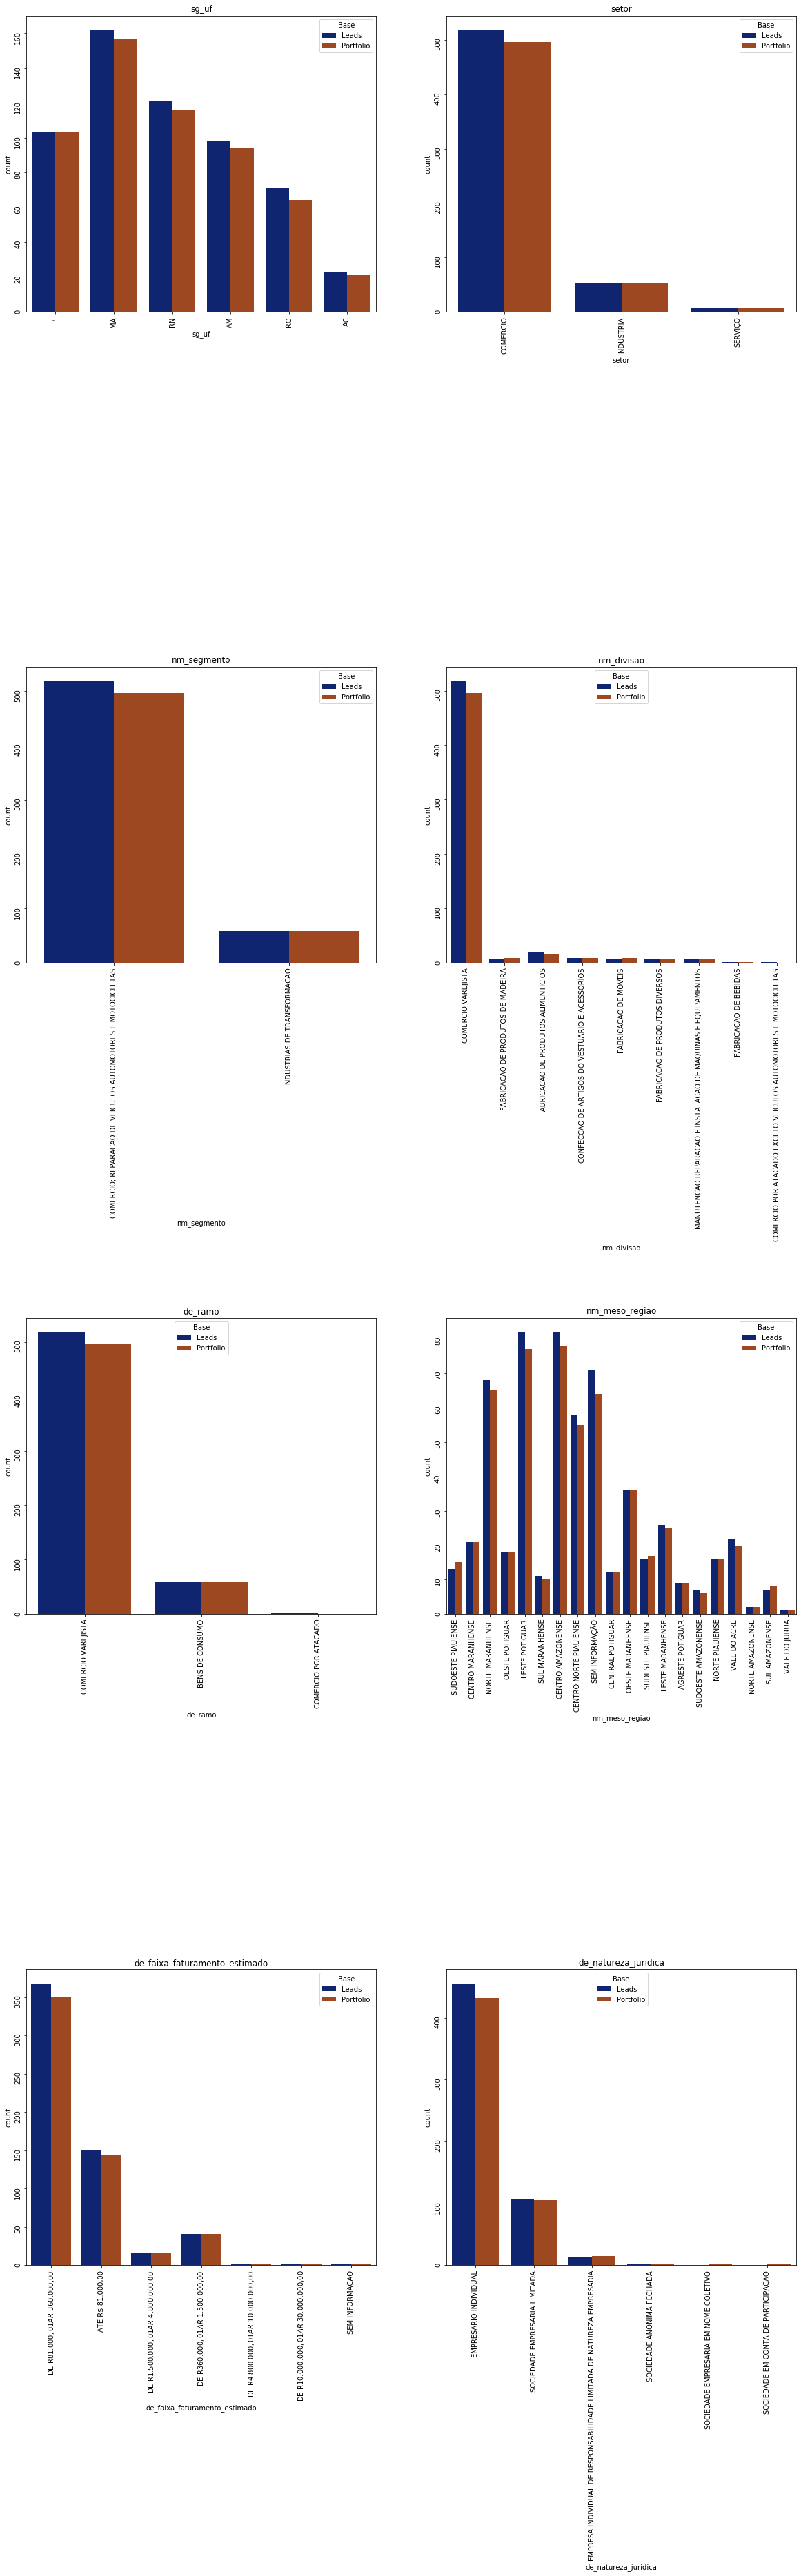

In [51]:
leads_1 = leads(portfolio1, nearestn_model, 2, colunas_treino, mercado)
plotar_comparativo(leads_1, portfolio1, 2,4, colunas_obs)

## Portfolio 2


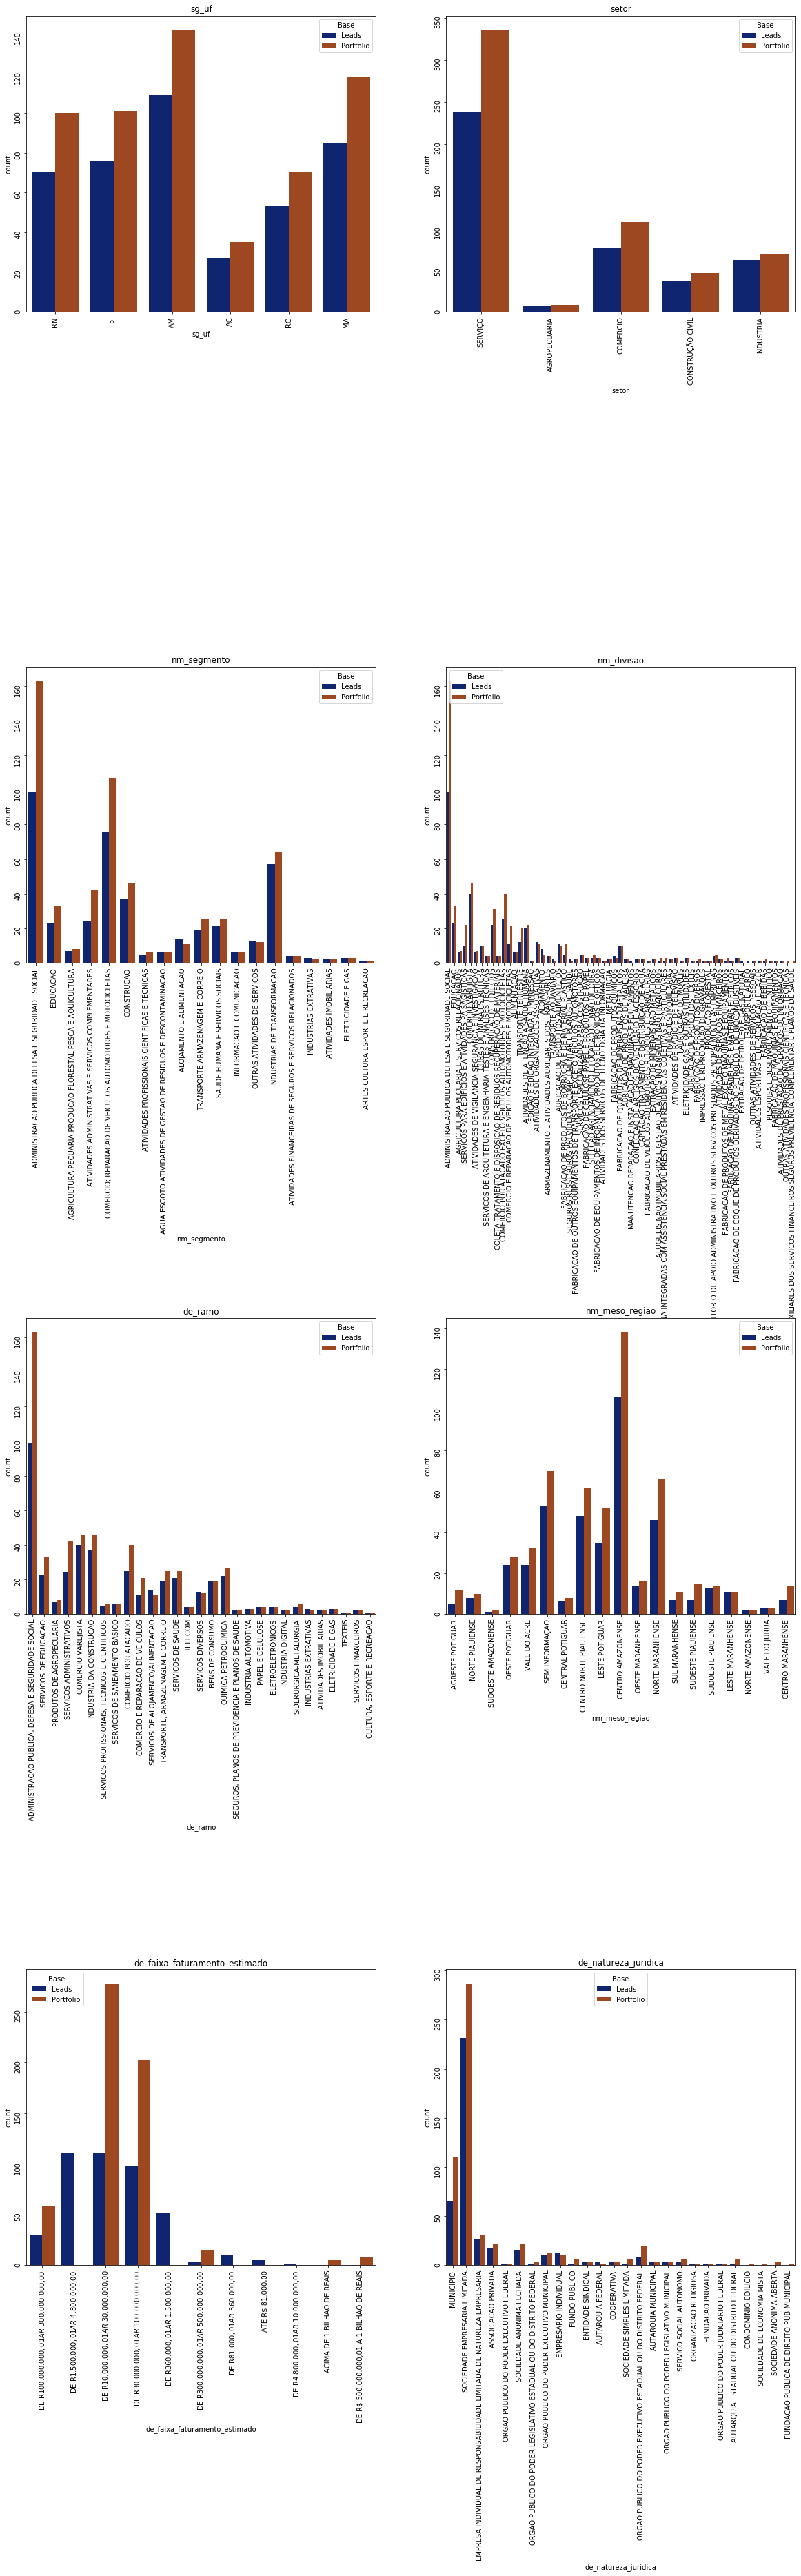

In [49]:
leads_2 = leads(portfolio2, nearestn_model, 2,colunas_treino, mercado)
plotar_comparativo(leads_2, portfolio2, 2,4, colunas_obs)

## Portfolio 3

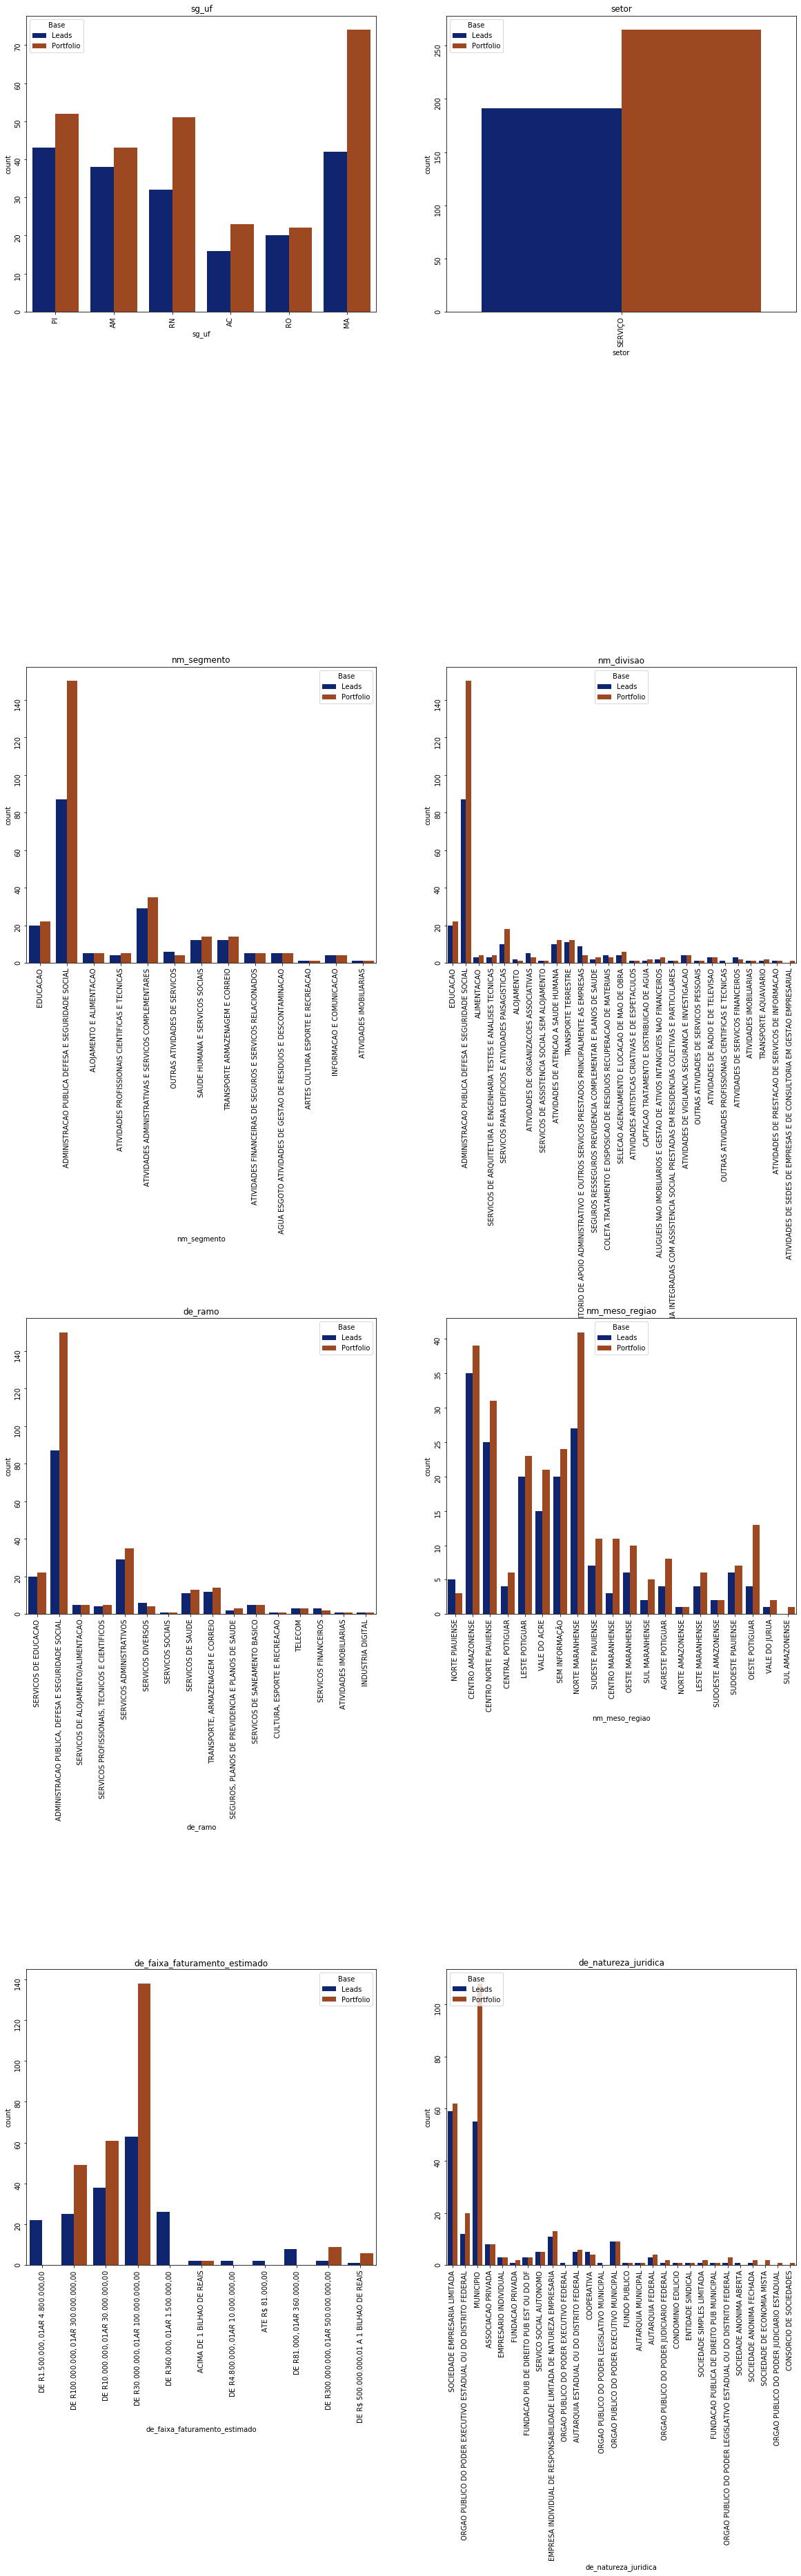

In [50]:
leads_3 = leads(portfolio3, nearestn_model, 2,colunas_treino, mercado)
plotar_comparativo(leads_3, portfolio3, 2,4, colunas_obs)

# Observações Finais

Observamos que mesmo tendo uma assertividade muito baixa para o portfólio 1, as análises acima nos mostrou que o que foi retornando foram leads muito parecidos com o portfólio.

## Sobre o Desenvolvimento do Projeto 

Os principais aprendizados durante o desenvolvimento desse projeto foi como planejar o 

Das principais dificuldades:

1. Análise do problema e escolha de um modelo que fosse condizente com o objetivo final.
2. Como lidar com tantas features, inconsistência dos registros (como valores NA) e o desconhecimento da importância delas dentro do contexto de negócio.

Dos principais acertos:

1. Ter o *insight* que o tamanho da população do mercado é muito maior que o tamanho do portfólio e isso influenciar na assertividade.
2. Entender como o modelo escolhido se comporta na minha base de dados e  que a mensuração da assertividade não é totalmente eficaz para saber se meu modelo é bom ou não. Dentro desse entendimento, confiar na escolha do modelo construído.


Devido a limitações de tempo e técnicas, a solução até agora permanece essa, porém com espaço para melhorias e mais discussões:

- Aplicar e explorar mais métodos de feature engineering
- Testar outros tipos de modelos de aprendizagem de máquina, como *clustering (ie. KMeans)*
- Melhoria na própria apresentação do projeto aqui feito (como fazer mais gráficos).

Por fim, fico feliz com o resultado que cheguei, considerando as limitações que tive e, principalmente, por esse ser meu primeiro projeto de recomendação e segundo projeto do zero de *Machine Learning*.

***Data Knows Better***